In [1]:
import os,cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.preprocessing import image
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
from keras import backend as K
#K.set_image_dim_ordering('th')

from keras.utils import np_utils
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
import pandas as pd
import csv
from os.path import splitext
from sklearn.preprocessing import LabelEncoder
from PIL import Image
from tensorflow.keras.callbacks import TensorBoard

Using TensorFlow backend.


In [2]:
# Load training and test data into dataframes
PATH = os.getcwd()
from keras.utils import to_categorical
df = pd.read_csv(PATH + '\\CNN-image-dataset.csv');

df = df.iloc[np.random.permutation(len(df))]
data_train = df[0:5000]
data_test = df[5001:]

# X forms the training images, and y forms the training labels
X = np.array(data_train.iloc[:, 3:])
y = to_categorical(np.array(data_train.iloc[:, 1]))

# Here I split original training data to sub-training (80%) and validation data (20%)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=13)

# X_test forms the test images, and y_test forms the test labels
X_test = np.array(data_test.iloc[:, 3:])
y_test = to_categorical(np.array(data_test.iloc[:, 1]))

In [3]:
# Each image's dimension is 28 x 28
img_rows, img_cols = 28, 28
input_shape = (img_rows, img_cols, 1)

# Prepare the training images
X_train = X_train.reshape(X_train.shape[0], img_rows, img_cols, 1)
X_train = X_train.astype('float32')
X_train /= 255

# Prepare the test images
X_test = X_test.reshape(X_test.shape[0], img_rows, img_cols, 1)
X_test = X_test.astype('float32')
X_test /= 255

# Prepare the validation images
X_val = X_val.reshape(X_val.shape[0], img_rows, img_cols, 1)
X_val = X_val.astype('float32')
X_val /= 255

In [4]:
print(X_train.shape)
print(X_test.shape)
print(X_val.shape)
print(y_val.shape)

(4000, 28, 28, 1)
(5000, 28, 28, 1)
(1000, 28, 28, 1)
(1000, 3)


In [5]:
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten
from keras.layers import Conv2D, MaxPooling2D, BatchNormalization

cnn4 = Sequential()
cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=input_shape))
cnn4.add(BatchNormalization())

cnn4.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Conv2D(128, kernel_size=(3, 3), activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(MaxPooling2D(pool_size=(2, 2)))
cnn4.add(Dropout(0.25))

cnn4.add(Flatten())

cnn4.add(Dense(512, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Dense(128, activation='relu'))
cnn4.add(BatchNormalization())
cnn4.add(Dropout(0.25))

cnn4.add(Dense(3, activation='softmax'))

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


In [6]:
cnn4.compile(loss=keras.losses.categorical_crossentropy,
              optimizer=keras.optimizers.Adam(),
              metrics=['accuracy'])

In [7]:
cnn4.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization_1 (Batch (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
batch_normalization_2 (Batch (None, 24, 24, 32)        128       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 12, 12, 32)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 10, 10, 64)        18496     
__________

In [8]:
import time
start_time = time.time()
history4 = cnn4.fit(X_train, y_train,
          batch_size=256,
          epochs=50,
          verbose=1,
          validation_data=(X_val, y_val))

print("--- %s seconds ---" % (time.time() - start_time))
cnn4_time = time.time() - start_time

Instructions for updating:
Use tf.cast instead.
Train on 4000 samples, validate on 1000 samples
Epoch 1/50
4000/4000 [==============================] - 26s 6ms/step - loss: 0.5029 - acc: 0.8222 - val_loss: 1.0815 - val_acc: 0.7920
Epoch 2/50
4000/4000 [==============================] - 20s 5ms/step - loss: 0.0742 - acc: 0.9860 - val_loss: 0.3038 - val_acc: 0.8560
Epoch 3/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0315 - acc: 0.9947 - val_loss: 0.1462 - val_acc: 0.9570
Epoch 4/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0254 - acc: 0.9955 - val_loss: 0.1166 - val_acc: 0.9680
Epoch 5/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0165 - acc: 0.9965 - val_loss: 0.1269 - val_acc: 0.9690
Epoch 6/50
4000/4000 [==============================] - 19s 5ms/step - loss: 0.0156 - acc: 0.9973 - val_loss: 0.1523 - val_acc: 0.9640
Epoch 7/50
4000/4000 [==============================] - 18s 5ms/step - loss: 0.0111 - acc: 0.9

In [9]:
score4 = cnn4.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score4[0])
print('Test accuracy:', score4[1])

Test loss: 0.02646232193792239
Test accuracy: 0.9968


50


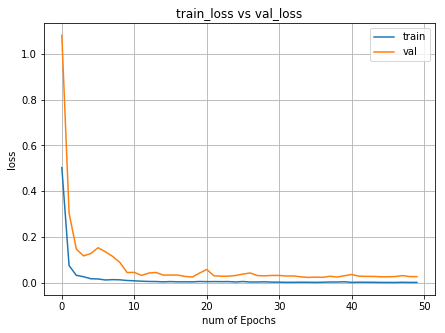

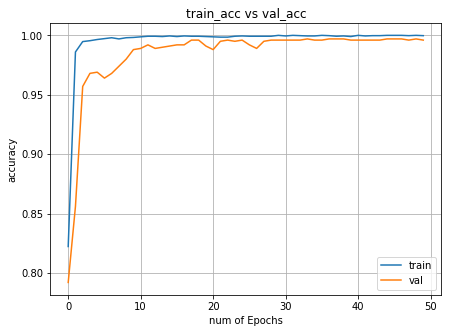

In [10]:
# visualizing losses and accuracy
train_loss=history4.history['loss']
val_loss=history4.history['val_loss']
train_acc=history4.history['acc']
val_acc=history4.history['val_acc']
xc=range(50)
print(len(train_loss))
plt.figure(1,figsize=(7,5))
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
#print plt.style.available # use bmh, classic,ggplot for big pictures
#plt.style.use(['classic'])

plt.figure(2,figsize=(7,5))
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','val'],loc=4)

In [11]:
# get the predictions for the test data
predicted_classes = cnn4.predict_classes(X_test)

# get the indices to be plotted
y_true = data_test.iloc[:, 1].values
correct = np.nonzero(predicted_classes==y_true)[0]
incorrect = np.nonzero(predicted_classes!=y_true)[0]

In [12]:
print(len(correct))
print(len(incorrect))

pred_accuracy = (len(correct)/5000) * 100

print("--- %s is the Prediction Accuracy ---" % (pred_accuracy))

4984
16
--- 99.68 is the Prediction Accuracy ---


5000
5000


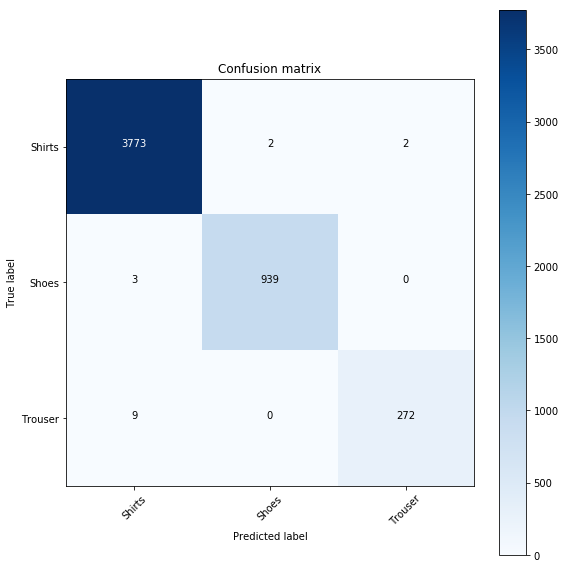

In [13]:
print(len(y_test))
print(len(predicted_classes))
classes = {0: 'Shirts', 
           1: 'Shoes', 
           2: 'Trouser'}

class_names = ['Shirts','Shoes','Trouser']
import itertools
from sklearn.metrics import confusion_matrix, classification_report
def plot_confusion_matrix(cm, classes,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    plt.figure(figsize = (8,8))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.show()
    
cnf_matrix = confusion_matrix(data_test.iloc[:, 1], predicted_classes)
plot_confusion_matrix(cnf_matrix, classes = class_names)

In [14]:
pred_accuracy

99.68

In [15]:
cnn4_time

901.9240398406982

In [ ]:
# Saving and loading model and weights
from keras.models import model_from_json
from keras.models import load_model

# serialize model to JSON
model_json = cnn4.to_json()
with open("cnn4.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
cnn4.save_weights("cnn4.h5")
print("Saved model to disk")

Saved model to disk
